In [1]:
import logging
import os

import tensorflow as tf
from sklearn.metrics import confusion_matrix, f1_score
from augment_data import augment_images

import matplotlib.pyplot as plt

# Logging Configuration
logging.basicConfig(level=logging.INFO,
                    format='%(name)s\t[%(levelname)-8s] %(message)s')
logger = logging.getLogger('CNN Eval')
logger.info('Tensorflow Version: %s' % tf.__version__)

CNN Eval	[INFO    ] Tensorflow Version: 2.2.0


# Loading Data
## Loading pre-trained model

In [2]:
# Loading trained model
#model_name = 'cnn_model_imagenet.tf'
model_name = 'flowers_imnet' # Trained using google colab
model = tf.keras.models.load_model(model_name)

## Loading data

In [3]:
cwd = os.getcwd() # current working directory
base_dir = os.path.join(cwd, 'img') # base image directory
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [4]:
# Define classes
classes = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# Visualizing Predictions

Found 2934 images belonging to 5 classes.
Found 736 images belonging to 5 classes.


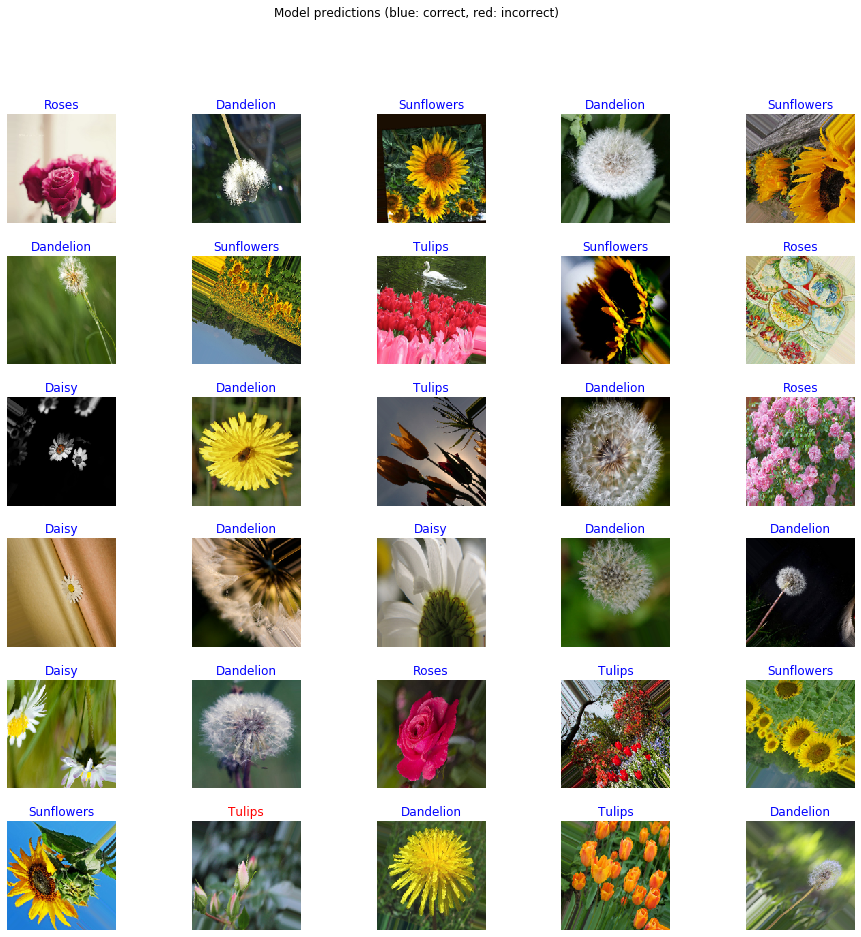

In [6]:
batch_size = 30
img_height, img_width = 160, 160
train_image_gen = augment_images(train_dir, 
        batch_size=batch_size,
        output_shape=(img_height, img_width),
        )
val_image_gen = augment_images(val_dir, 
        batch_size=batch_size,
        output_shape=(img_height, img_width),
        )
image_batch, label_batch = next(train_image_gen)

predictions = model.predict(image_batch)
predicted_ids = np.argmax(predictions, axis=-1)
plt.figure(figsize=(16,15))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_ids[n] == label_batch[n] else "red"
  plt.title(classes[predicted_ids[n]].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")
plt.savefig("output/cnn_model_predictions2.png")

In [7]:
def plot_confusion_matrix(image_gen, title=""):
    image_batch, label_batch = next(image_gen)

    predictions = model.predict(image_batch)
    predicted_ids = np.argmax(predictions, axis=-1)

    num_correct = sum(predicted_ids == label_batch)
    num_false = sum(predicted_ids != label_batch)


    conf_mx = confusion_matrix(label_batch, predicted_ids)

    plt.matshow(conf_mx)
    plt.colorbar()
    plt.title("Confusion Matrix %s" % title)
    plt.savefig('output/confusion_matrix_%s.png' % title)
    plt.show()

    np.fill_diagonal(conf_mx, 0)
    plt.matshow(conf_mx)
    plt.colorbar()
    plt.title("Confusion Matrix %s" % title)
    plt.savefig('output/confusion_matrix_wo_diag_%s.png' % title)
    plt.show()

    plt.figure()
    f1 = f1_score(np.int64(label_batch), 
                  predicted_ids, 
                  average=None)
    plt.bar(classes, f1)
    plt.ylim([0,1])
    plt.title("F1 Score %s" % title)
    plt.savefig('output/f1_score_%s.png' % title)
    plt.show()

Found 2934 images belonging to 5 classes.
Found 736 images belonging to 5 classes.


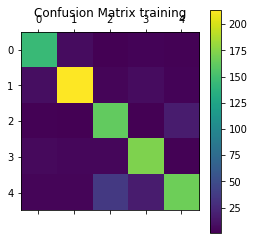

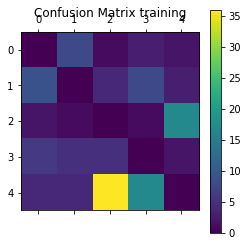

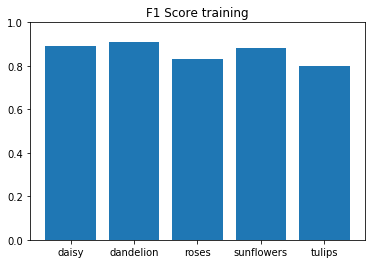

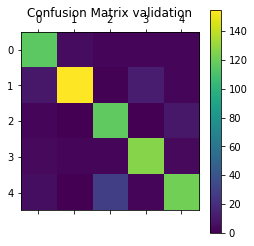

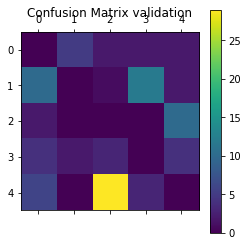

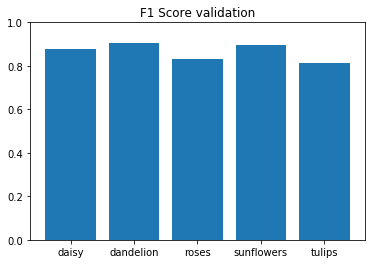

In [9]:
batch_size = 1000
img_size = 160, 160
train_image_gen = augment_images(train_dir, 
        batch_size=batch_size,
        output_shape=img_size,
        )
val_image_gen = augment_images(val_dir, 
        batch_size=batch_size,
        output_shape=img_size,
        )

plot_confusion_matrix(train_image_gen, 'training')
plot_confusion_matrix(val_image_gen, 'validation')